In [ ]:
# Loading data from local drive

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving diabetes_clean2.csv to diabetes_clean2.csv
User uploaded file "diabetes_clean2.csv" with length 33685 bytes


In [ ]:
import pandas as pd
df1 = pd.read_csv("diabetes_clean2.csv")

In [ ]:
# Let's look at the data snippet
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### Describe the data

Here we can see that there are 9 columns in the data. All columns seem to be numeric in nature which is good for modelling. In case of Character string columns, we could have used dummy numeric variables for modelling. The columns here are:

0. Number of times pregnant.
1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
2. Diastolic blood pressure (mm Hg).
3. Triceps skinfold thickness (mm).
4. 2-Hour serum insulin (mu U/ml).
5. Body mass index (weight in kg/(height in m)^2).
6. Diabetes pedigree function.
7. Age (years).
8. Outcome: Class variable (0 or 1).

In [ ]:
# Checking data tyoes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


All values seem to be in the integer or float format which is opt for modelling. 
Hence there is no type conversions required on the dataset. 
The row count of the data is 768. Hence the shape of our data is ***768 * 9***

In [ ]:
# Checking for missing data

df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Checking data ranges and basic summary
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data distributions after treating missing values : df1

Here we could spot the range, average values and the outliers in the data columns.

### Bivariate Analysis

We would be analysing our Individual Variables with respect to the class outcome. That is:

1. Diabetic
2. Non-Diabetic






In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns





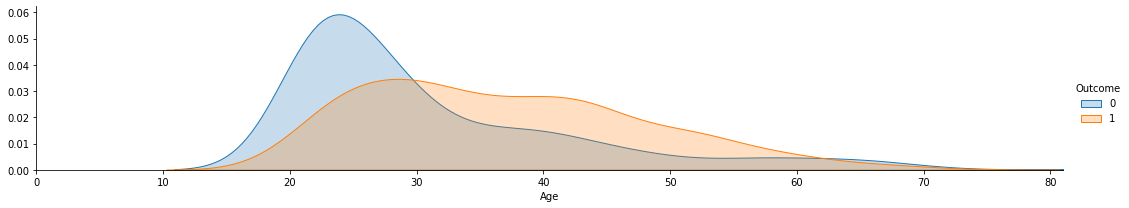

In [ ]:
# Age Analysis

fig = sns.FacetGrid(df1, hue="Outcome", aspect =5)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = df1['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

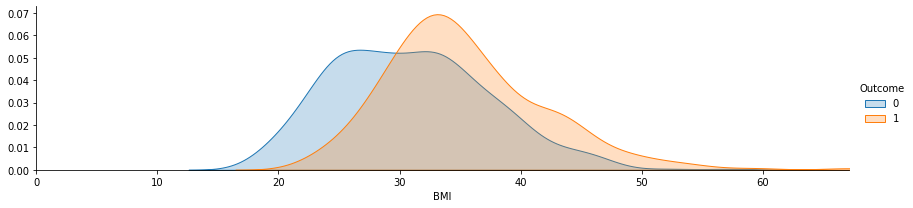

In [ ]:
# BMI

fig = sns.FacetGrid(df1, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'BMI', shade=True)
oldest = df1['BMI'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

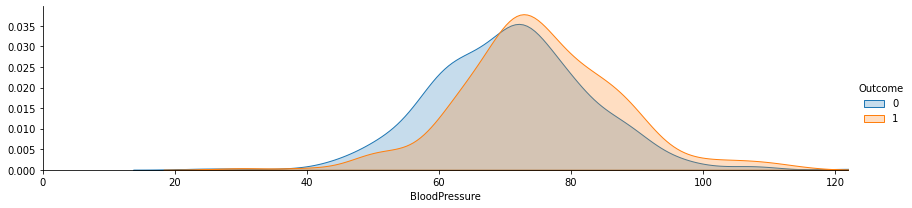

In [ ]:
# Blood Pressure

fig = sns.FacetGrid(df1, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'BloodPressure', shade=True)
oldest = df1['BloodPressure'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

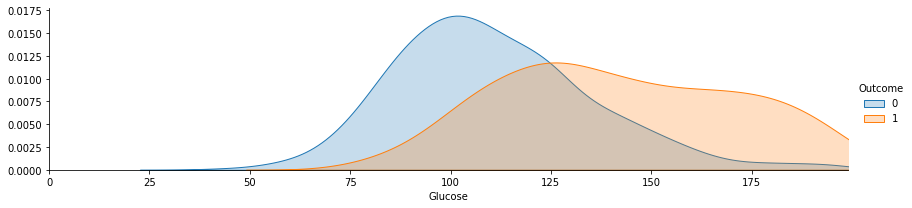

In [ ]:
# Glucose

fig = sns.FacetGrid(df1, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'Glucose', shade=True)
oldest = df1['Glucose'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

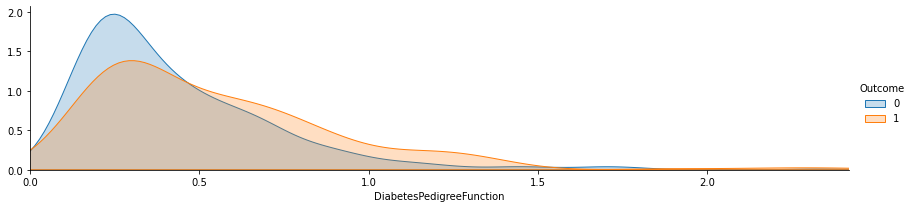

In [ ]:
# Diabetes Pedigree Function

fig = sns.FacetGrid(df1, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'DiabetesPedigreeFunction', shade=True)
oldest = df1['DiabetesPedigreeFunction'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

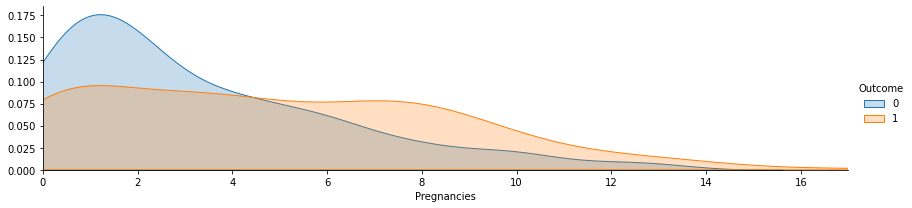

In [ ]:
# Pregnancies

fig = sns.FacetGrid(df1, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'Pregnancies', shade=True)
oldest = df1['Pregnancies'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

### Analysis Results:

From the ***Bi-variate Analysis*** we could conclude that certain parameters clearly stand out in Diabetics vs Non-Diabetics.
These were:

*   Age
*   Insulin
*   BMI
*   Glucose
*   Pregnancies

In these parameters, certain counts tend to be more in line with non-diabetics. For example, Diabetes is seen more as Age increses or Glucose level increases. These paramters would definitely help in classifying the model.


### Object Correlatoins :


### Modelling with treated missing values: 
**Train / Test Split with preserving outcome ratio using Stratify**


In [ ]:
from sklearn.model_selection import train_test_split

train,test= train_test_split(df1,test_size=0.25,random_state=0,stratify=df1['Outcome'])# stratify the outcome

train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

In [ ]:
# Original data split

from sklearn.model_selection import train_test_split

train,test= train_test_split(df1,test_size=0.25,random_state=0,stratify=df1['Outcome'])# stratify the outcome

train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']


### Random Forest Model

In [ ]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(train_X,train_Y)
p = model.predict(test_X)

# Results
print('The accuracy Score is:\n',metrics.accuracy_score(p,test_Y))


The accuracy Score is:
 0.7708333333333334


### Backward Selection Technique

###Step 1:
We will evaluate the Important features and remove the one with least importance and check our accuracy changes.

In [ ]:
pd.Series(model.feature_importances_,index= train_X.columns).sort_values(ascending=False)

Glucose                     0.249622
BMI                         0.154760
Age                         0.143585
DiabetesPedigreeFunction    0.124671
Insulin                     0.085665
BloodPressure               0.083620
Pregnancies                 0.082484
SkinThickness               0.075593
dtype: float64

In [ ]:
# RF on df1 without "SkinThickness"

# Train Test Split
train,test= train_test_split(df1[['Glucose','BMI','Age', 'DiabetesPedigreeFunction', 'Insulin', 'BloodPressure','Pregnancies','Outcome']],test_size=0.25,random_state=0,stratify=df1['Outcome'])# stratify the outcome

train_X=train[train.columns[:7]]
test_X=test[test.columns[:7]]
train_Y=train['Outcome']
test_Y=test['Outcome']

# Random Forest Model
model1= RandomForestClassifier(n_estimators=100,random_state=0)
model1.fit(train_X,train_Y)
p1 = model1.predict(test_X)

# Accuracy Results
print('The accuracy Score is:\n',metrics.accuracy_score(p1,test_Y))

The accuracy Score is:
 0.78125


In [ ]:
model1.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=209652396, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=398764591, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, ma

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import load_iris
# from sklearn.datasets import load_breast_cancer
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# from sklearn import tree

In [ ]:
# fn=df1.columns[:7]
# cn=True
# fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=3000)
# for index in range(0, 5):
#     tree.plot_tree(model1.estimators_[index],
#                    feature_names = fn, 
#                    class_names=cn,
#                    filled = True,
#                    ax = axes[index]);
    
#     axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
# fig.savefig('rf_5trees2.png')

### Model Results (Evaluation metrics)


In [ ]:
# Accuracy Results
print('The accuracy Score is:\n',metrics.accuracy_score(p1,test_Y))
print('\n \n The confusion matrix: \n', metrics.confusion_matrix(p1, test_Y))
print('\n\n The metrics classification report:\n ', metrics.classification_report(p1, test_Y))

The accuracy Score is:
 0.78125

 
 The confusion matrix: 
 [[110  27]
 [ 15  40]]


 The metrics classification report:
                precision    recall  f1-score   support

           0       0.88      0.80      0.84       137
           1       0.60      0.73      0.66        55

    accuracy                           0.78       192
   macro avg       0.74      0.77      0.75       192
weighted avg       0.80      0.78      0.79       192



In [ ]:
# Calculating AUC

prob = model1.predict_proba(test_X)

# Using possitive porbability for AUC
prob = prob[:, 1]

#AUC
auc = metrics.roc_auc_score(test_Y, prob)
print('AUC: %.2f' % auc)


AUC: 0.84


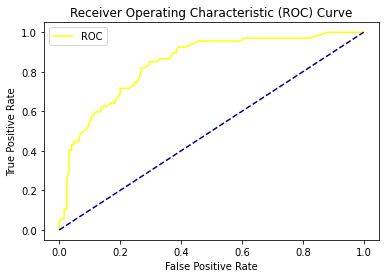

In [ ]:
# Define ROC Curve

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='yellow', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


fpr, tpr, thresholds = metrics.roc_curve(test_Y, prob)
plot_roc_curve(fpr, tpr)

Here, we can see that the Final model has an ***Accuracy*** of 0.781. It has an***Area Under the Curve*** of 0.84.

The confusion matrix above shows how the model correctly interprets 110 true negatives while missing out on 27 and correctly predicts 40 true possitves while missing out on 15.

The model's ROC Curve shows the trade-off between the true positive rate and false positive rate in the random Forest Model.


### Conclusion

Diabetes is a serious disease in our society. It is very common in developing nations. In India, it is said that nearly 7% of the adult populaiton has diabetes and it is commonly found in my family as well. A Machine learning model, if used in the right manner could help in detecting symptoms that lead up to Diabetes. This could have tremendous health and cost benefits to the users. 

From our Model we are able to predict with Diabetes with 78% accuracy. It is also important to note that the 2 most important factors while detecting diabetes are:

1. Glucose
2. Body Mass Index


### References

1. https://www.kaggle.com/uciml/pima-indians-diabetes-database

2. https://stackabuse.com/understanding-roc-curves-with-python/

3. https://machinelearningmastery.com/